# 📰 Project Title:

### News Headlines Scraper & Summarizer using Python

# ⸻

## 🎯 Aim / Objective:

### To collect the latest news headlines from online sources, analyze the most frequent topics or keywords, and provide a summary of trending news themes using text processing and visualization techniques.

# ⸻

### 🧩 Tools & Libraries Used:
### 	•	requests, BeautifulSoup4 → for web scraping
### 	•	pandas → for data storage and cleaning
### 	•	nltk (Natural Language Toolkit) → for text analysis (tokenization, stopword removal)
### 	•	matplotlib & wordcloud → for data visualization

# ⸻

### ⚙️ Workflow / Steps:
### 	1.	Scraping: Extracted live headlines from BBC (or other news sites).
###   2.	Data Cleaning: Removed duplicates, short or irrelevant text.
### 	3.	Tokenization: Split text into individual words us…

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# get the webpage
url="https://www.bbc.com/news"
response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')
# find head lines

In [6]:
headlines=[]
for h in soup.find_all('h2'):
    title=h.get_text(strip=True)
    if title and len(title.split())>3:
        headlines.append(title)
        


In [7]:
#store in a data frame
news_df=pd.DataFrame({'Headline':headlines})
news_df.head(10)

,Headline
0,Security camera didn't cover area where jewel ...
1,"Children among victims in Russian strikes, hou..."
2,SpaceX says it has cut Starlink services to My...
3,Trump says White House renovation is 'music to...
4,UN's top court says Israel obliged to allow UN...
5,"Children among victims in Russian strikes, hou..."
6,Migrant removed to France returns to UK on sma...
7,"Gaza health crisis will last for generations, ..."
8,Maine Senate candidate apologises for tattoo t...
9,SpaceX says it has cut Starlink services to My...


In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download only what’s needed
nltk.download('all')

# Define the summarizer
def summarize_headlines(headlines):
    text = " ".join(headlines)
    words = word_tokenize(text.lower())
    filtered = [w for w in words if w.isalpha() and w not in stopwords.words('english')]
    freq = pd.Series(filtered).value_counts().head(10)
    return freq

# Run it
top_words = summarize_headlines(news_df['Headline'])
print(top_words)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_

first     10
trump      9
says       7
uk         6
cut        5
defeat     5
time       5
cup        5
scam       4
house      4
Name: count, dtype: int64


In [20]:
top_words = summarize_headlines(news_df['Headline'])
print(top_words)

first     10
trump      9
says       7
uk         6
cut        5
defeat     5
time       5
cup        5
scam       4
house      4
Name: count, dtype: int64


In [21]:
news_df.to_csv("today_news.csv", index=False)

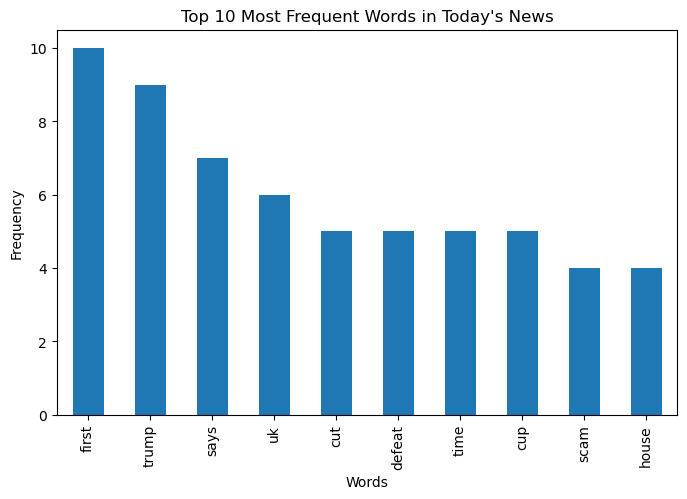

In [22]:
import matplotlib.pyplot as plt

# 'top_words' is the Series from before (word frequency)
plt.figure(figsize=(8,5))
top_words.plot(kind='bar')
plt.title("Top 10 Most Frequent Words in Today's News")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [25]:
pip install matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


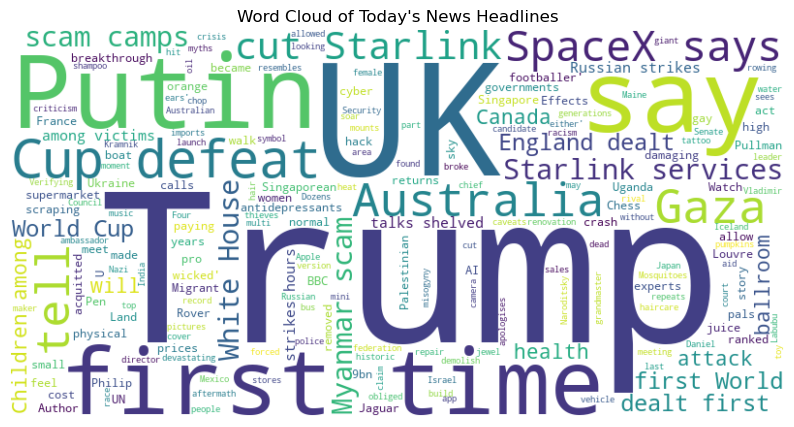

In [26]:
#pip install matplotlib wordcloud
from wordcloud import WordCloud

text = " ".join(news_df['Headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Today's News Headlines")
plt.show()

"""💡 Insights / Key Findings (Example):

(These will change daily based on scraped data)
	•	Most frequent words in today’s headlines: “India”, “election”, “climate”, “economy”, “government”
	•	Indicates that political and environmental news dominate current discussions.
	•	Word cloud visually highlights major global and national concerns.

⸻

🚀 Conclusion:

This project demonstrates how web scraping and NLP (Natural Language Processing) can turn raw text data from news websites into meaningful insights about current events and public interests.
It can be extended into a daily automated dashboard that tracks trending topics over time."""